In [1]:
import sys
print(sys.executable)

C:\Users\treye\anaconda3\envs\curling\python.exe


In [2]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
stones = pd.read_csv("C:/Users/treye/Downloads/Stones.csv", low_memory = False)
teams = pd.read_csv("C:/Users/treye/Downloads/Teams.csv", low_memory = False)
games = pd.read_csv("C:/Users/treye/Downloads/Games.csv", low_memory = False)
ends = pd.read_csv("C:/Users/treye/Downloads/Ends.csv", low_memory = False)
competitors = pd.read_csv("C:/Users/treye/Downloads/Competitors.csv", low_memory = False)
competition = pd.read_csv("C:/Users/treye/Downloads/Competition.csv", low_memory = False)

In [4]:
ends

,CompetitionID,SessionID,GameID,TeamID,EndID,Result,PowerPlay
0,0,1,1,19,1,0,NaN
1,0,1,1,27,1,1,NaN
2,0,1,1,19,2,2,NaN
3,0,1,1,27,2,0,NaN
4,0,1,1,19,3,0,NaN
...,...,...,...,...,...,...,...
5269,24250026,49,1,24,5,1,NaN
5270,24250026,49,1,14,6,3,2.0
5271,24250026,49,1,24,6,0,NaN
5272,24250026,49,1,14,7,0,NaN


In [5]:
stones

,CompetitionID,SessionID,GameID,EndID,ShotID,TeamID,PlayerID,Task,Handle,Points,...,stone_8_x,stone_8_y,stone_9_x,stone_9_y,stone_10_x,stone_10_y,stone_11_x,stone_11_y,stone_12_x,stone_12_y
0,0,1,1,1,7,19,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,1,1,8,27,1,0,1,2,...,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,1,9,19,2,0,0,4,...,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,1,1,16,27,2,0,0,0,...,892.0,1232.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,1,1,17,19,2,7,0,3,...,4095.0,0.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26365,24250026,49,1,7,18,24,2,9,0,4,...,901.0,470.0,787.0,2001.0,500.0,567.0,0.0,0.0,0.0,0.0
26366,24250026,49,1,7,19,14,2,0,0,3,...,901.0,470.0,787.0,2001.0,500.0,567.0,0.0,0.0,0.0,0.0
26367,24250026,49,1,7,20,24,2,6,0,4,...,901.0,470.0,787.0,2001.0,500.0,567.0,272.0,797.0,0.0,0.0
26368,24250026,49,1,7,21,14,1,0,0,4,...,901.0,470.0,787.0,2001.0,500.0,567.0,272.0,797.0,0.0,0.0


In [6]:
ends["PowerPlay"] = ends["PowerPlay"].replace("", np.nan)
ends["PowerPlay"] = pd.to_numeric(ends["PowerPlay"], errors="coerce")
shots = stones.merge(ends, on = ["CompetitionID", "SessionID", "GameID", "TeamID", "EndID"], how = "left")
shots

,CompetitionID,SessionID,GameID,EndID,ShotID,TeamID,PlayerID,Task,Handle,Points,...,stone_9_x,stone_9_y,stone_10_x,stone_10_y,stone_11_x,stone_11_y,stone_12_x,stone_12_y,Result,PowerPlay
0,0,1,1,1,7,19,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
1,0,1,1,1,8,27,1,0,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
2,0,1,1,1,9,19,2,0,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
3,0,1,1,1,16,27,2,0,0,0,...,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
4,0,1,1,1,17,19,2,7,0,3,...,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26365,24250026,49,1,7,18,24,2,9,0,4,...,787.0,2001.0,500.0,567.0,0.0,0.0,0.0,0.0,4,NaN
26366,24250026,49,1,7,19,14,2,0,0,3,...,787.0,2001.0,500.0,567.0,0.0,0.0,0.0,0.0,0,NaN
26367,24250026,49,1,7,20,24,2,6,0,4,...,787.0,2001.0,500.0,567.0,272.0,797.0,0.0,0.0,4,NaN
26368,24250026,49,1,7,21,14,1,0,0,4,...,787.0,2001.0,500.0,567.0,272.0,797.0,0.0,0.0,0,NaN


In [7]:
pd.set_option('display.max_columns', None)

In [8]:
ends["PowerPlay"].value_counts()

PowerPlay
1.0    313
2.0    285
Name: count, dtype: int64

In [9]:
shots["TotalShotNumberInEnd"] = shots.groupby(["CompetitionID", "SessionID", "GameID", "EndID"]).cumcount()+1
shots["TotalShotsRemainingInEnd"] = 10 - shots["TotalShotNumberInEnd"]
shots["PowerPlay"] = shots["PowerPlay"].fillna(0)
shots

,CompetitionID,SessionID,GameID,EndID,ShotID,TeamID,PlayerID,Task,Handle,Points,TimeOut,stone_1_x,stone_1_y,stone_2_x,stone_2_y,stone_3_x,stone_3_y,stone_4_x,stone_4_y,stone_5_x,stone_5_y,stone_6_x,stone_6_y,stone_7_x,stone_7_y,stone_8_x,stone_8_y,stone_9_x,stone_9_y,stone_10_x,stone_10_y,stone_11_x,stone_11_y,stone_12_x,stone_12_y,Result,PowerPlay,TotalShotNumberInEnd,TotalShotsRemainingInEnd
0,0,1,1,1,7,19,1,0,0,0,NaN,750.0,1916.0,4095.0,4095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1,9
1,0,1,1,1,8,27,1,0,1,2,NaN,750.0,1916.0,4095.0,4095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,2,8
2,0,1,1,1,9,19,2,0,0,4,NaN,750.0,1916.0,4095.0,4095.0,694.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,3,7
3,0,1,1,1,16,27,2,0,0,0,NaN,963.0,1657.0,4095.0,4095.0,694.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,4,6
4,0,1,1,1,17,19,2,7,0,3,NaN,963.0,1657.0,4095.0,4095.0,694.0,756.0,636.0,1080.0,0.0,0.0,0.0,0.0,750.0,650.0,4095.0,0.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26365,24250026,49,1,7,18,24,2,9,0,4,NaN,4095.0,0.0,4095.0,0.0,429.0,179.0,4095.0,0.0,0.0,0.0,0.0,0.0,4095.0,0.0,901.0,470.0,787.0,2001.0,500.0,567.0,0.0,0.0,0.0,0.0,4,0.0,6,4
26366,24250026,49,1,7,19,14,2,0,0,3,NaN,4095.0,0.0,4095.0,0.0,429.0,179.0,4095.0,0.0,760.0,1152.0,0.0,0.0,4095.0,0.0,901.0,470.0,787.0,2001.0,500.0,567.0,0.0,0.0,0.0,0.0,0,0.0,7,3
26367,24250026,49,1,7,20,24,2,6,0,4,NaN,4095.0,0.0,4095.0,0.0,429.0,179.0,4095.0,0.0,4095.0,0.0,0.0,0.0,4095.0,0.0,901.0,470.0,787.0,2001.0,500.0,567.0,272.0,797.0,0.0,0.0,4,0.0,8,2
26368,24250026,49,1,7,21,14,1,0,0,4,NaN,4095.0,0.0,4095.0,0.0,429.0,179.0,4095.0,0.0,4095.0,0.0,781.0,804.0,4095.0,0.0,901.0,470.0,787.0,2001.0,500.0,567.0,272.0,797.0,0.0,0.0,0,0.0,9,1


In [10]:
shots["HasHammer"] = shots["TotalShotNumberInEnd"].apply(lambda x:1 if x in [2,4,6,8,10] else 0)
shots

,CompetitionID,SessionID,GameID,EndID,ShotID,TeamID,PlayerID,Task,Handle,Points,TimeOut,stone_1_x,stone_1_y,stone_2_x,stone_2_y,stone_3_x,stone_3_y,stone_4_x,stone_4_y,stone_5_x,stone_5_y,stone_6_x,stone_6_y,stone_7_x,stone_7_y,stone_8_x,stone_8_y,stone_9_x,stone_9_y,stone_10_x,stone_10_y,stone_11_x,stone_11_y,stone_12_x,stone_12_y,Result,PowerPlay,TotalShotNumberInEnd,TotalShotsRemainingInEnd,HasHammer
0,0,1,1,1,7,19,1,0,0,0,NaN,750.0,1916.0,4095.0,4095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1,9,0
1,0,1,1,1,8,27,1,0,1,2,NaN,750.0,1916.0,4095.0,4095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,2,8,1
2,0,1,1,1,9,19,2,0,0,4,NaN,750.0,1916.0,4095.0,4095.0,694.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,3,7,0
3,0,1,1,1,16,27,2,0,0,0,NaN,963.0,1657.0,4095.0,4095.0,694.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,4,6,1
4,0,1,1,1,17,19,2,7,0,3,NaN,963.0,1657.0,4095.0,4095.0,694.0,756.0,636.0,1080.0,0.0,0.0,0.0,0.0,750.0,650.0,4095.0,0.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,5,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26365,24250026,49,1,7,18,24,2,9,0,4,NaN,4095.0,0.0,4095.0,0.0,429.0,179.0,4095.0,0.0,0.0,0.0,0.0,0.0,4095.0,0.0,901.0,470.0,787.0,2001.0,500.0,567.0,0.0,0.0,0.0,0.0,4,0.0,6,4,1
26366,24250026,49,1,7,19,14,2,0,0,3,NaN,4095.0,0.0,4095.0,0.0,429.0,179.0,4095.0,0.0,760.0,1152.0,0.0,0.0,4095.0,0.0,901.0,470.0,787.0,2001.0,500.0,567.0,0.0,0.0,0.0,0.0,0,0.0,7,3,0
26367,24250026,49,1,7,20,24,2,6,0,4,NaN,4095.0,0.0,4095.0,0.0,429.0,179.0,4095.0,0.0,4095.0,0.0,0.0,0.0,4095.0,0.0,901.0,470.0,787.0,2001.0,500.0,567.0,272.0,797.0,0.0,0.0,4,0.0,8,2,1
26368,24250026,49,1,7,21,14,1,0,0,4,NaN,4095.0,0.0,4095.0,0.0,429.0,179.0,4095.0,0.0,4095.0,0.0,781.0,804.0,4095.0,0.0,901.0,470.0,787.0,2001.0,500.0,567.0,272.0,797.0,0.0,0.0,0,0.0,9,1,0


In [11]:
shots["TeamPlayerID"] = (shots["TeamID"].astype(int).astype(str) 
                         + shots["PlayerID"].astype(int).astype(str)).astype(int)
shots["MatchID"] = (shots["CompetitionID"].astype(int).astype(str) 
                         + shots["SessionID"].astype(int).astype(str) + shots["GameID"].astype(int).astype(str)).astype(int)

In [12]:
shots = shots[(shots["Task"]>=0) & (shots["Task"]<=13)]

In [13]:
shots["Task"].value_counts()

Task
0     13511
3      2717
9      2088
2      2052
6      1993
10     1045
7      1025
8       936
4       455
1       160
11      133
5       113
Name: count, dtype: int64

In [14]:
shots = shots[shots["Result"] != 9]

In [15]:
shots["Result"].value_counts()

Result
0    12910
1     7170
2     3551
3     1545
4      435
5      115
6       10
Name: count, dtype: int64

In [16]:
def team_shot(df):
    df = df.copy()
    df.loc[df["HasHammer"] == 0, "TeamShotNumberInEnd"] = (
        df.loc[df["HasHammer"] == 0, "TotalShotNumberInEnd"] // 2 + 1
    )
    df.loc[df["HasHammer"] == 1, "TeamShotNumberInEnd"] = (
        df.loc[df["HasHammer"] == 1, "TotalShotNumberInEnd"] // 2
    )
    df["TeamShotsRemainingInEnd"] = 5 - df["TeamShotNumberInEnd"]
    return df
def opponent_shots_remaining(df):
    df = df.copy()
    df.loc[df["HasHammer"] == 1, "OpponentShotNumberInEnd"] = (
        df.loc[df["HasHammer"] == 1, "TotalShotNumberInEnd"] // 2
    )
    df.loc[df["HasHammer"] == 0, "OpponentShotNumberInEnd"] = (
        df.loc[df["HasHammer"] == 0, "TotalShotNumberInEnd"] // 2
    )
    df["OpponentShotsRemainingInEnd"] = 5 - df["OpponentShotNumberInEnd"]
    return df
shots = team_shot(shots)
shots = opponent_shots_remaining(shots)

In [17]:
ends["TotalGameScoreAfterEnd"] = ends.groupby(["CompetitionID", "SessionID", "GameID", 
                                       "TeamID"])["Result"].cumsum()
ends["TotalGameScoreStartOfEnd"] = ends["TotalGameScoreAfterEnd"] - ends["Result"]
ends["OpponentScoreStartOfEnd"] = ends.groupby(["CompetitionID", "SessionID", "GameID", 
                                                "EndID"])["TotalGameScoreStartOfEnd"].transform("sum") - ends["TotalGameScoreStartOfEnd"]
ends["ScoreDiffStartOfEnd"] = ends["TotalGameScoreStartOfEnd"] - ends["OpponentScoreStartOfEnd"]
ends["OpponentResult"] = ends.groupby(["CompetitionID", "SessionID", "GameID", 
                                                "EndID"])["Result"].transform("sum") - ends["Result"]
ends["EndDifferential"] = ends["Result"] - ends["OpponentResult"]
ends["EndScoringOutcome"] = ends.apply(lambda x: 0 if x["Result"] > 0 else 1 if x["OpponentResult"] > 0 else 2, axis = 1)

ends

,CompetitionID,SessionID,GameID,TeamID,EndID,Result,PowerPlay,TotalGameScoreAfterEnd,TotalGameScoreStartOfEnd,OpponentScoreStartOfEnd,ScoreDiffStartOfEnd,OpponentResult,EndDifferential,EndScoringOutcome
0,0,1,1,19,1,0,NaN,0,0,0,0,1,-1,1
1,0,1,1,27,1,1,NaN,1,0,0,0,0,1,0
2,0,1,1,19,2,2,NaN,2,0,1,-1,0,2,0
3,0,1,1,27,2,0,NaN,1,1,0,1,2,-2,1
4,0,1,1,19,3,0,NaN,2,2,1,1,3,-3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5269,24250026,49,1,24,5,1,NaN,5,4,1,3,0,1,0
5270,24250026,49,1,14,6,3,2.0,4,1,5,-4,0,3,0
5271,24250026,49,1,24,6,0,NaN,5,5,1,4,3,-3,1
5272,24250026,49,1,14,7,0,NaN,4,4,5,-1,4,-4,1


In [18]:
ends["EndScoringOutcome"].value_counts()

EndScoringOutcome
0    2692
1    2572
2      10
Name: count, dtype: int64

In [19]:
shots = shots.merge(ends[["CompetitionID", "SessionID", "GameID", "EndID", "TeamID", "TotalGameScoreStartOfEnd", "OpponentScoreStartOfEnd", "ScoreDiffStartOfEnd", "OpponentResult", "EndDifferential", "EndScoringOutcome"]], 
                    on = ["CompetitionID", "SessionID", "GameID", "EndID", "TeamID"], how = "left")
shots

,CompetitionID,SessionID,GameID,EndID,ShotID,TeamID,PlayerID,Task,Handle,Points,TimeOut,stone_1_x,stone_1_y,stone_2_x,stone_2_y,stone_3_x,stone_3_y,stone_4_x,stone_4_y,stone_5_x,stone_5_y,stone_6_x,stone_6_y,stone_7_x,stone_7_y,stone_8_x,stone_8_y,stone_9_x,stone_9_y,stone_10_x,stone_10_y,stone_11_x,stone_11_y,stone_12_x,stone_12_y,Result,PowerPlay,TotalShotNumberInEnd,TotalShotsRemainingInEnd,HasHammer,TeamPlayerID,MatchID,TeamShotNumberInEnd,TeamShotsRemainingInEnd,OpponentShotNumberInEnd,OpponentShotsRemainingInEnd,TotalGameScoreStartOfEnd,OpponentScoreStartOfEnd,ScoreDiffStartOfEnd,OpponentResult,EndDifferential,EndScoringOutcome
0,0,1,1,1,7,19,1,0,0,0,NaN,750.0,1916.0,4095.0,4095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1,9,0,191,11,1.0,4.0,0.0,5.0,0,0,0,1,-1,1
1,0,1,1,1,8,27,1,0,1,2,NaN,750.0,1916.0,4095.0,4095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,2,8,1,271,11,1.0,4.0,1.0,4.0,0,0,0,0,1,0
2,0,1,1,1,9,19,2,0,0,4,NaN,750.0,1916.0,4095.0,4095.0,694.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,3,7,0,192,11,2.0,3.0,1.0,4.0,0,0,0,1,-1,1
3,0,1,1,1,16,27,2,0,0,0,NaN,963.0,1657.0,4095.0,4095.0,694.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,4,6,1,272,11,2.0,3.0,2.0,3.0,0,0,0,0,1,0
4,0,1,1,1,17,19,2,7,0,3,NaN,963.0,1657.0,4095.0,4095.0,694.0,756.0,636.0,1080.0,0.0,0.0,0.0,0.0,750.0,650.0,4095.0,0.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,5,5,0,192,11,3.0,2.0,2.0,3.0,0,0,0,1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25731,24250026,49,1,7,18,24,2,9,0,4,NaN,4095.0,0.0,4095.0,0.0,429.0,179.0,4095.0,0.0,0.0,0.0,0.0,0.0,4095.0,0.0,901.0,470.0,787.0,2001.0,500.0,567.0,0.0,0.0,0.0,0.0,4,0.0,6,4,1,242,24250026491,3.0,2.0,3.0,2.0,5,4,1,0,4,0
25732,24250026,49,1,7,19,14,2,0,0,3,NaN,4095.0,0.0,4095.0,0.0,429.0,179.0,4095.0,0.0,760.0,1152.0,0.0,0.0,4095.0,0.0,901.0,470.0,787.0,2001.0,500.0,567.0,0.0,0.0,0.0,0.0,0,0.0,7,3,0,142,24250026491,4.0,1.0,3.0,2.0,4,5,-1,4,-4,1
25733,24250026,49,1,7,20,24,2,6,0,4,NaN,4095.0,0.0,4095.0,0.0,429.0,179.0,4095.0,0.0,4095.0,0.0,0.0,0.0,4095.0,0.0,901.0,470.0,787.0,2001.0,500.0,567.0,272.0,797.0,0.0,0.0,4,0.0,8,2,1,242,24250026491,4.0,1.0,4.0,1.0,5,4,1,0,4,0
25734,24250026,49,1,7,21,14,1,0,0,4,NaN,4095.0,0.0,4095.0,0.0,429.0,179.0,4095.0,0.0,4095.0,0.0,781.0,804.0,4095.0,0.0,901.0,470.0,787.0,2001.0,500.0,567.0,272.0,797.0,0.0,0.0,0,0.0,9,1,0,141,24250026491,5.0,0.0,4.0,1.0,4,5,-1,4,-4,1


In [20]:
nn_features = ["CompetitionID", "SessionID", "GameID", "EndID", "TeamID", "TeamPlayerID", "MatchID", "Task", "Result", "PowerPlay", "TeamShotsRemainingInEnd", "OpponentShotsRemainingInEnd", "ScoreDiffStartOfEnd", "OpponentResult", "EndDifferential", "EndScoringOutcome", "HasHammer", "stone_1_x", "stone_1_y", "stone_2_x", "stone_2_y"
              , "stone_3_x", "stone_3_y", "stone_4_x", "stone_4_y", "stone_5_x", "stone_5_y", "stone_6_x", "stone_6_y"
              , "stone_7_x", "stone_7_y", "stone_8_x", "stone_8_y", "stone_9_x", "stone_9_y", "stone_10_x", "stone_10_y"
              , "stone_11_x", "stone_11_y", "stone_12_x", "stone_12_y"]
nnshots = shots[nn_features]

In [21]:
nnshots = nnshots.dropna()

In [22]:
nnshots.isna().sum()

CompetitionID                  0
SessionID                      0
GameID                         0
EndID                          0
TeamID                         0
TeamPlayerID                   0
MatchID                        0
Task                           0
Result                         0
PowerPlay                      0
TeamShotsRemainingInEnd        0
OpponentShotsRemainingInEnd    0
ScoreDiffStartOfEnd            0
OpponentResult                 0
EndDifferential                0
EndScoringOutcome              0
HasHammer                      0
stone_1_x                      0
stone_1_y                      0
stone_2_x                      0
stone_2_y                      0
stone_3_x                      0
stone_3_y                      0
stone_4_x                      0
stone_4_y                      0
stone_5_x                      0
stone_5_y                      0
stone_6_x                      0
stone_6_y                      0
stone_7_x                      0
stone_7_y 

In [23]:
nnshots = nnshots.reset_index(drop=True)
nnshots

,CompetitionID,SessionID,GameID,EndID,TeamID,TeamPlayerID,MatchID,Task,Result,PowerPlay,TeamShotsRemainingInEnd,OpponentShotsRemainingInEnd,ScoreDiffStartOfEnd,OpponentResult,EndDifferential,EndScoringOutcome,HasHammer,stone_1_x,stone_1_y,stone_2_x,stone_2_y,stone_3_x,stone_3_y,stone_4_x,stone_4_y,stone_5_x,stone_5_y,stone_6_x,stone_6_y,stone_7_x,stone_7_y,stone_8_x,stone_8_y,stone_9_x,stone_9_y,stone_10_x,stone_10_y,stone_11_x,stone_11_y,stone_12_x,stone_12_y
0,0,1,1,1,19,191,11,0,0,0.0,4.0,5.0,0,1,-1,1,0,750.0,1916.0,4095.0,4095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,1,1,27,271,11,0,1,0.0,4.0,4.0,0,0,1,0,1,750.0,1916.0,4095.0,4095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,1,19,192,11,0,0,0.0,3.0,4.0,0,1,-1,1,0,750.0,1916.0,4095.0,4095.0,694.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,1,1,27,272,11,0,1,0.0,3.0,3.0,0,0,1,0,1,963.0,1657.0,4095.0,4095.0,694.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,1,1,19,192,11,7,0,0.0,2.0,3.0,0,1,-1,1,0,963.0,1657.0,4095.0,4095.0,694.0,756.0,636.0,1080.0,0.0,0.0,0.0,0.0,750.0,650.0,4095.0,0.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25731,24250026,49,1,7,24,242,24250026491,9,4,0.0,2.0,2.0,1,0,4,0,1,4095.0,0.0,4095.0,0.0,429.0,179.0,4095.0,0.0,0.0,0.0,0.0,0.0,4095.0,0.0,901.0,470.0,787.0,2001.0,500.0,567.0,0.0,0.0,0.0,0.0
25732,24250026,49,1,7,14,142,24250026491,0,0,0.0,1.0,2.0,-1,4,-4,1,0,4095.0,0.0,4095.0,0.0,429.0,179.0,4095.0,0.0,760.0,1152.0,0.0,0.0,4095.0,0.0,901.0,470.0,787.0,2001.0,500.0,567.0,0.0,0.0,0.0,0.0
25733,24250026,49,1,7,24,242,24250026491,6,4,0.0,1.0,1.0,1,0,4,0,1,4095.0,0.0,4095.0,0.0,429.0,179.0,4095.0,0.0,4095.0,0.0,0.0,0.0,4095.0,0.0,901.0,470.0,787.0,2001.0,500.0,567.0,272.0,797.0,0.0,0.0
25734,24250026,49,1,7,14,141,24250026491,0,0,0.0,0.0,1.0,-1,4,-4,1,0,4095.0,0.0,4095.0,0.0,429.0,179.0,4095.0,0.0,4095.0,0.0,781.0,804.0,4095.0,0.0,901.0,470.0,787.0,2001.0,500.0,567.0,272.0,797.0,0.0,0.0


In [24]:
def is_invalid_stone(df, i):
    x = df[f"stone_{i}_x"]
    y = df[f"stone_{i}_y"]
    return (
        ((x==0)&(y==0)) | 
        ((x==4095)&(y==4095)))
for i in range(1, 13):
    col_name = f"stone_{i}_is_teams"
    nnshots[col_name] = np.where(
    ((i<=6) & (nnshots["HasHammer"]==0)) |
    ((i>=7) & (nnshots["HasHammer"]==1)), 1, 0)
    invalid_mask = is_invalid_stone(nnshots, i)
    nnshots.loc[invalid_mask, col_name] = 0
nnshots

,CompetitionID,SessionID,GameID,EndID,TeamID,TeamPlayerID,MatchID,Task,Result,PowerPlay,TeamShotsRemainingInEnd,OpponentShotsRemainingInEnd,ScoreDiffStartOfEnd,OpponentResult,EndDifferential,EndScoringOutcome,HasHammer,stone_1_x,stone_1_y,stone_2_x,stone_2_y,stone_3_x,stone_3_y,stone_4_x,stone_4_y,stone_5_x,stone_5_y,stone_6_x,stone_6_y,stone_7_x,stone_7_y,stone_8_x,stone_8_y,stone_9_x,stone_9_y,stone_10_x,stone_10_y,stone_11_x,stone_11_y,stone_12_x,stone_12_y,stone_1_is_teams,stone_2_is_teams,stone_3_is_teams,stone_4_is_teams,stone_5_is_teams,stone_6_is_teams,stone_7_is_teams,stone_8_is_teams,stone_9_is_teams,stone_10_is_teams,stone_11_is_teams,stone_12_is_teams
0,0,1,1,1,19,191,11,0,0,0.0,4.0,5.0,0,1,-1,1,0,750.0,1916.0,4095.0,4095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,27,271,11,0,1,0.0,4.0,4.0,0,0,1,0,1,750.0,1916.0,4095.0,4095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,0,0,0,0
2,0,1,1,1,19,192,11,0,0,0.0,3.0,4.0,0,1,-1,1,0,750.0,1916.0,4095.0,4095.0,694.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0
3,0,1,1,1,27,272,11,0,1,0.0,3.0,3.0,0,0,1,0,1,963.0,1657.0,4095.0,4095.0,694.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0
4,0,1,1,1,19,192,11,7,0,0.0,2.0,3.0,0,1,-1,1,0,963.0,1657.0,4095.0,4095.0,694.0,756.0,636.0,1080.0,0.0,0.0,0.0,0.0,750.0,650.0,4095.0,0.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25731,24250026,49,1,7,24,242,24250026491,9,4,0.0,2.0,2.0,1,0,4,0,1,4095.0,0.0,4095.0,0.0,429.0,179.0,4095.0,0.0,0.0,0.0,0.0,0.0,4095.0,0.0,901.0,470.0,787.0,2001.0,500.0,567.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,1,0,0
25732,24250026,49,1,7,14,142,24250026491,0,0,0.0,1.0,2.0,-1,4,-4,1,0,4095.0,0.0,4095.0,0.0,429.0,179.0,4095.0,0.0,760.0,1152.0,0.0,0.0,4095.0,0.0,901.0,470.0,787.0,2001.0,500.0,567.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0,0,0,0,0,0,0
25733,24250026,49,1,7,24,242,24250026491,6,4,0.0,1.0,1.0,1,0,4,0,1,4095.0,0.0,4095.0,0.0,429.0,179.0,4095.0,0.0,4095.0,0.0,0.0,0.0,4095.0,0.0,901.0,470.0,787.0,2001.0,500.0,567.0,272.0,797.0,0.0,0.0,0,0,0,0,0,0,1,1,1,1,1,0
25734,24250026,49,1,7,14,141,24250026491,0,0,0.0,0.0,1.0,-1,4,-4,1,0,4095.0,0.0,4095.0,0.0,429.0,179.0,4095.0,0.0,4095.0,0.0,781.0,804.0,4095.0,0.0,901.0,470.0,787.0,2001.0,500.0,567.0,272.0,797.0,0.0,0.0,1,1,1,1,1,1,0,0,0,0,0,0


In [25]:
for i in range(1, 13):
    x_col = f"stone_{i}_x"
    y_col = f"stone_{i}_y"
    d_col = f"stone_{i}_dist_to_button"
    nnshots[d_col] = np.sqrt(
        (nnshots[x_col] - 750)**2 + 
        (nnshots[y_col] - 800)**2)
    invalid_mask = is_invalid_stone(nnshots, i)
    nnshots.loc[invalid_mask, d_col] = 4000

In [26]:
BUTTON_X = 750
BUTTON_Y = 800
HOUSE_RADIUS = 600

def add_stones_in_house(df):
    df = df.copy()

    for i in range(1, 13):
        dx = df[f"stone_{i}_x"] - BUTTON_X
        dy = df[f"stone_{i}_y"] - BUTTON_Y

        df[f"stone_{i}_in_house"] = (
            np.sqrt(dx**2 + dy**2) <= HOUSE_RADIUS
        ).astype(int)

    return df
nnshots = add_stones_in_house(nnshots)
nnshots["OwnStonesInHouse"] = sum(
    nnshots[f"stone_{i}_in_house"] * nnshots[f"stone_{i}_is_teams"]
    for i in range(1, 13)
)
nnshots["OppStonesInHouse"] = sum(
    nnshots[f"stone_{i}_in_house"] * (1 - nnshots[f"stone_{i}_is_teams"])
    for i in range(1, 13)
)
nnshots["StonesInHouseDiff"] = (
    nnshots["OwnStonesInHouse"] - nnshots["OppStonesInHouse"]
)
nnshots

,CompetitionID,SessionID,GameID,EndID,TeamID,TeamPlayerID,MatchID,Task,Result,PowerPlay,TeamShotsRemainingInEnd,OpponentShotsRemainingInEnd,ScoreDiffStartOfEnd,OpponentResult,EndDifferential,EndScoringOutcome,HasHammer,stone_1_x,stone_1_y,stone_2_x,stone_2_y,stone_3_x,stone_3_y,stone_4_x,stone_4_y,stone_5_x,stone_5_y,stone_6_x,stone_6_y,stone_7_x,stone_7_y,stone_8_x,stone_8_y,stone_9_x,stone_9_y,stone_10_x,stone_10_y,stone_11_x,stone_11_y,stone_12_x,stone_12_y,stone_1_is_teams,stone_2_is_teams,stone_3_is_teams,stone_4_is_teams,stone_5_is_teams,stone_6_is_teams,stone_7_is_teams,stone_8_is_teams,stone_9_is_teams,stone_10_is_teams,stone_11_is_teams,stone_12_is_teams,stone_1_dist_to_button,stone_2_dist_to_button,stone_3_dist_to_button,stone_4_dist_to_button,stone_5_dist_to_button,stone_6_dist_to_button,stone_7_dist_to_button,stone_8_dist_to_button,stone_9_dist_to_button,stone_10_dist_to_button,stone_11_dist_to_button,stone_12_dist_to_button,stone_1_in_house,stone_2_in_house,stone_3_in_house,stone_4_in_house,stone_5_in_house,stone_6_in_house,stone_7_in_house,stone_8_in_house,stone_9_in_house,stone_10_in_house,stone_11_in_house,stone_12_in_house,OwnStonesInHouse,OppStonesInHouse,StonesInHouseDiff
0,0,1,1,1,19,191,11,0,0,0.0,4.0,5.0,0,1,-1,1,0,750.0,1916.0,4095.0,4095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1116.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,150.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,1,-1
1,0,1,1,1,27,271,11,0,1,0.0,4.0,4.0,0,0,1,0,1,750.0,1916.0,4095.0,4095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,0,0,0,0,1116.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,150.000000,454.739486,4000.000000,4000.000000,4000.000000,4000.000000,0,0,0,0,0,0,1,1,0,0,0,0,2,0,2
2,0,1,1,1,19,192,11,0,0,0.0,3.0,4.0,0,1,-1,1,0,750.0,1916.0,4095.0,4095.0,694.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,1116.000000,4000.000000,71.217975,4000.000000,4000.000000,4000.000000,150.000000,454.739486,4000.000000,4000.000000,4000.000000,4000.000000,0,0,1,0,0,0,1,1,0,0,0,0,1,2,-1
3,0,1,1,1,27,272,11,0,1,0.0,3.0,3.0,0,0,1,0,1,963.0,1657.0,4095.0,4095.0,694.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,883.073043,4000.000000,71.217975,4000.000000,4000.000000,4000.000000,150.000000,454.739486,873.549083,4000.000000,4000.000000,4000.000000,0,0,1,0,0,0,1,1,0,0,0,0,2,1,1
4,0,1,1,1,19,192,11,7,0,0.0,2.0,3.0,0,1,-1,1,0,963.0,1657.0,4095.0,4095.0,694.0,756.0,636.0,1080.0,0.0,0.0,0.0,0.0,750.0,650.0,4095.0,0.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,1,0,0,0,0,0,0,0,0,883.073043,4000.000000,71.217975,302.317714,4000.000000,4000.000000,150.000000,3439.334965,873.549083,4000.000000,4000.000000,4000.000000,0,0,1,1,0,0,1,0,0,0,0,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25731,24250026,49,1,7,24,242,24250026491,9,4,0.0,2.0,2.0,1,0,4,0,1,4095.0,0.0,4095.0,0.0,429.0,179.0,4095.0,0.0,0.0,0.0,0.0,0.0,4095.0,0.0,901.0,470.0,787.0,2001.0,500.0,567.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,1,0,0,3439.334965,3439.334965,699.057938,3439.334965,4000.000000,4000.000000,3439.334965,362.906324,1201.569807,341.744056,4000.000000,4000.000000,0,0,0,0,0,0,0,1,0,1,0,0,2,0,2
25732,24250026,49,1,7,14,142,24250026491,0,0,0.0,1.0,2.0,-1,4,-4,1,0,4095.0,0.0,4095.0,0.0,429.0,179.0,4095.0,0.0,760.0,1152.0,0.0,0.0,4095.0,0.0,901.0,470.0,787.0,2001.0,500.0,567.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0,0,0,0,0,0,0,3439.334965,3439.334965,699.057938,3439.334965,352

In [27]:
nnshots["OwnClosestDist"] = (
    nnshots[[f"stone_{i}_dist_to_button" for i in range(1,13)]]
    .where(nnshots[[f"stone_{i}_is_teams" for i in range(1,13)]].values == 1)
    .min(axis=1)
)
nnshots["OwnClosestDist"] = nnshots["OwnClosestDist"].fillna(5000)

nnshots["OppClosestDist"] = (
    nnshots[[f"stone_{i}_dist_to_button" for i in range(1,13)]]
    .where(nnshots[[f"stone_{i}_is_teams" for i in range(1,13)]].values == 0)
    .min(axis=1)
)
nnshots["ClosestStoneDiff"] = nnshots["OppClosestDist"] - nnshots["OwnClosestDist"]
nnshots["OwnStonesCloserThanOpp"] = sum(
    ((nnshots[f"stone_{i}_dist_to_button"] < nnshots["OppClosestDist"]) &
     (nnshots[f"stone_{i}_is_teams"] == 1)).astype(int)
    for i in range(1,13))
nnshots["TotalStonesInHouse"] = nnshots["OwnStonesInHouse"] + nnshots["OppStonesInHouse"]


In [28]:
CROWDED_RADIUS = 200
nnshots["StonesCrowdedNearButton"] = sum((nnshots[f"stone_{i}_dist_to_button"]
                                          < CROWDED_RADIUS).astype(int)
                                         for i in range(1, 13))
MEDIUM_CROWDED_RADIUS = 400
nnshots["StonesMediumCrowdedNearButton"] = sum((nnshots[f"stone_{i}_dist_to_button"]
                                          < MEDIUM_CROWDED_RADIUS).astype(int)
                                         for i in range(1, 13))

In [29]:
nnshots["GameTeamID"] = (
    nnshots["CompetitionID"].astype(str) + "_" +
    nnshots["SessionID"].astype(str) + "_" +
    nnshots["GameID"].astype(str) + "_" +
    nnshots["TeamID"].astype(str)
)
pp_used_end = (
    nnshots[nnshots["PowerPlay"] == 1]
    .groupby("GameTeamID")["EndID"]
    .min()
    .rename("PowerPlayUsedEnd")
)
nnshots = nnshots.merge(pp_used_end, on="GameTeamID", how="left")
nnshots["HasUsedPowerPlay"] = (
    (nnshots["PowerPlayUsedEnd"].notna()) &
    (nnshots["EndID"] > nnshots["PowerPlayUsedEnd"])
).astype(int)

In [30]:
games

,CompetitionID,SessionID,GameID,GroupID,Sheet,NOC1,NOC2,ResultStr1,ResultStr2,LSFE,Winner,TeamID1,TeamID2
0,0,1,1,0,A,SWE,GBR,5,9,0,0,19,27
1,0,1,2,0,B,AUS,USA,5,6,1,0,46,20
2,0,1,3,0,C,NOR,CZE,6,7,0,0,17,22
3,0,1,4,0,D,CHN,SUI,7,6,1,1,43,18
4,0,2,1,0,A,AUS,CHN,5,6,0,0,46,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,24250026,46,1,0,B,ITA,EST,7,6,1,1,24,37
340,24250026,46,2,0,D,AUS,SCO,6,9,1,0,46,14
341,24250026,46,3,0,C,CAN,USA,4,8,1,0,10,20
342,24250026,48,1,0,C,AUS,EST,9,2,1,1,46,37


In [31]:
games["WinningTeamID"] = games.apply(lambda x: x["TeamID2"] if x["Winner"] == 0 else x["TeamID1"], axis = 1)
nnshots = nnshots.merge(games[["CompetitionID", "SessionID", "GameID", "WinningTeamID"]], on=["CompetitionID", "SessionID", "GameID"], how = "left")
nnshots["StoneTeamWonGame"] = nnshots.apply(lambda x: 1 if x["WinningTeamID"] == x["TeamID"] else 0, axis = 1)
nnshots

,CompetitionID,SessionID,GameID,EndID,TeamID,TeamPlayerID,MatchID,Task,Result,PowerPlay,TeamShotsRemainingInEnd,OpponentShotsRemainingInEnd,ScoreDiffStartOfEnd,OpponentResult,EndDifferential,EndScoringOutcome,HasHammer,stone_1_x,stone_1_y,stone_2_x,stone_2_y,stone_3_x,stone_3_y,stone_4_x,stone_4_y,stone_5_x,stone_5_y,stone_6_x,stone_6_y,stone_7_x,stone_7_y,stone_8_x,stone_8_y,stone_9_x,stone_9_y,stone_10_x,stone_10_y,stone_11_x,stone_11_y,stone_12_x,stone_12_y,stone_1_is_teams,stone_2_is_teams,stone_3_is_teams,stone_4_is_teams,stone_5_is_teams,stone_6_is_teams,stone_7_is_teams,stone_8_is_teams,stone_9_is_teams,stone_10_is_teams,stone_11_is_teams,stone_12_is_teams,stone_1_dist_to_button,stone_2_dist_to_button,stone_3_dist_to_button,stone_4_dist_to_button,stone_5_dist_to_button,stone_6_dist_to_button,stone_7_dist_to_button,stone_8_dist_to_button,stone_9_dist_to_button,stone_10_dist_to_button,stone_11_dist_to_button,stone_12_dist_to_button,stone_1_in_house,stone_2_in_house,stone_3_in_house,stone_4_in_house,stone_5_in_house,stone_6_in_house,stone_7_in_house,stone_8_in_house,stone_9_in_house,stone_10_in_house,stone_11_in_house,stone_12_in_house,OwnStonesInHouse,OppStonesInHouse,StonesInHouseDiff,OwnClosestDist,OppClosestDist,ClosestStoneDiff,OwnStonesCloserThanOpp,TotalStonesInHouse,StonesCrowdedNearButton,StonesMediumCrowdedNearButton,GameTeamID,PowerPlayUsedEnd,HasUsedPowerPlay,WinningTeamID,StoneTeamWonGame
0,0,1,1,1,19,191,11,0,0,0.0,4.0,5.0,0,1,-1,1,0,750.0,1916.0,4095.0,4095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1116.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,150.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,1,-1,1116.000000,150.000000,-966.000000,0,1,1,1,0_1_1_19,7.0,0,27,0
1,0,1,1,1,27,271,11,0,1,0.0,4.0,4.0,0,0,1,0,1,750.0,1916.0,4095.0,4095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,0,0,0,0,1116.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,150.000000,454.739486,4000.000000,4000.000000,4000.000000,4000.000000,0,0,0,0,0,0,1,1,0,0,0,0,2,0,2,150.000000,1116.000000,966.000000,2,2,1,1,0_1_1_27,6.0,0,27,1
2,0,1,1,1,19,192,11,0,0,0.0,3.0,4.0,0,1,-1,1,0,750.0,1916.0,4095.0,4095.0,694.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,1116.000000,4000.000000,71.217975,4000.000000,4000.000000,4000.000000,150.000000,454.739486,4000.000000,4000.000000,4000.000000,4000.000000,0,0,1,0,0,0,1,1,0,0,0,0,1,2,-1,71.217975,150.000000,78.782025,1,3,2,2,0_1_1_19,7.0,0,27,0
3,0,1,1,1,27,272,11,0,1,0.0,3.0,3.0,0,0,1,0,1,963.0,1657.0,4095.0,4095.0,694.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,883.073043,4000.000000,71.217975,4000.000000,4000.000000,4000.000000,150.000000,454.739486,873.549083,4000.000000,4000.000000,4000.000000,0,0,1,0,0,0,1,1,0,0,0,0,2,1,1,150.000000,71.217975,-78.782025,0,3,2,2,0_1_1_27,6.0,0,27,1
4,0,1,1,1,19,192,11,7,0,0.0,2.0,3.0,0,1,-1,1,0,963.0,1657.0,4095.0,4095.0,694.0,756.0,636.0,1080.0,0.0,0.0,0.0,0.0,750.0,650.0,4095.0,0.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,1,0,0,0,0,0,0,0,0,883.073043,4000.000000,71.217975,302.317714,4000.000000,4000.000000,150.000000,3439.334965,873.549083,4000.000000,4000.000000,4000.000000,0,0,1,1,0,0,1,0,0,0,0,0,2,1,1,71.217975,150.000000,78.782025,1,3,2,3,0_1_1_19,7.0,0,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25731,24250026,49,1,7,24,242,24250026491,9,4,0.0,2.0,2.0,1,0,4,0,1,4095.0,0.0,4095.0,0.0,4

In [32]:
games

,CompetitionID,SessionID,GameID,GroupID,Sheet,NOC1,NOC2,ResultStr1,ResultStr2,LSFE,Winner,TeamID1,TeamID2,WinningTeamID
0,0,1,1,0,A,SWE,GBR,5,9,0,0,19,27,27
1,0,1,2,0,B,AUS,USA,5,6,1,0,46,20,20
2,0,1,3,0,C,NOR,CZE,6,7,0,0,17,22,22
3,0,1,4,0,D,CHN,SUI,7,6,1,1,43,18,43
4,0,2,1,0,A,AUS,CHN,5,6,0,0,46,43,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,24250026,46,1,0,B,ITA,EST,7,6,1,1,24,37,24
340,24250026,46,2,0,D,AUS,SCO,6,9,1,0,46,14,14
341,24250026,46,3,0,C,CAN,USA,4,8,1,0,10,20,20
342,24250026,48,1,0,C,AUS,EST,9,2,1,1,46,37,46


In [33]:
nnshots.head(60)

,CompetitionID,SessionID,GameID,EndID,TeamID,TeamPlayerID,MatchID,Task,Result,PowerPlay,TeamShotsRemainingInEnd,OpponentShotsRemainingInEnd,ScoreDiffStartOfEnd,OpponentResult,EndDifferential,EndScoringOutcome,HasHammer,stone_1_x,stone_1_y,stone_2_x,stone_2_y,stone_3_x,stone_3_y,stone_4_x,stone_4_y,stone_5_x,stone_5_y,stone_6_x,stone_6_y,stone_7_x,stone_7_y,stone_8_x,stone_8_y,stone_9_x,stone_9_y,stone_10_x,stone_10_y,stone_11_x,stone_11_y,stone_12_x,stone_12_y,stone_1_is_teams,stone_2_is_teams,stone_3_is_teams,stone_4_is_teams,stone_5_is_teams,stone_6_is_teams,stone_7_is_teams,stone_8_is_teams,stone_9_is_teams,stone_10_is_teams,stone_11_is_teams,stone_12_is_teams,stone_1_dist_to_button,stone_2_dist_to_button,stone_3_dist_to_button,stone_4_dist_to_button,stone_5_dist_to_button,stone_6_dist_to_button,stone_7_dist_to_button,stone_8_dist_to_button,stone_9_dist_to_button,stone_10_dist_to_button,stone_11_dist_to_button,stone_12_dist_to_button,stone_1_in_house,stone_2_in_house,stone_3_in_house,stone_4_in_house,stone_5_in_house,stone_6_in_house,stone_7_in_house,stone_8_in_house,stone_9_in_house,stone_10_in_house,stone_11_in_house,stone_12_in_house,OwnStonesInHouse,OppStonesInHouse,StonesInHouseDiff,OwnClosestDist,OppClosestDist,ClosestStoneDiff,OwnStonesCloserThanOpp,TotalStonesInHouse,StonesCrowdedNearButton,StonesMediumCrowdedNearButton,GameTeamID,PowerPlayUsedEnd,HasUsedPowerPlay,WinningTeamID,StoneTeamWonGame
0,0,1,1,1,19,191,11,0,0,0.0,4.0,5.0,0,1,-1,1,0,750.0,1916.0,4095.0,4095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1116.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,150.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,1,-1,1116.000000,150.000000,-966.000000,0,1,1,1,0_1_1_19,7.0,0,27,0
1,0,1,1,1,27,271,11,0,1,0.0,4.0,4.0,0,0,1,0,1,750.0,1916.0,4095.0,4095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,0,0,0,0,1116.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,150.000000,454.739486,4000.000000,4000.000000,4000.000000,4000.000000,0,0,0,0,0,0,1,1,0,0,0,0,2,0,2,150.000000,1116.000000,966.000000,2,2,1,1,0_1_1_27,6.0,0,27,1
2,0,1,1,1,19,192,11,0,0,0.0,3.0,4.0,0,1,-1,1,0,750.0,1916.0,4095.0,4095.0,694.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,1116.000000,4000.000000,71.217975,4000.000000,4000.000000,4000.000000,150.000000,454.739486,4000.000000,4000.000000,4000.000000,4000.000000,0,0,1,0,0,0,1,1,0,0,0,0,1,2,-1,71.217975,150.000000,78.782025,1,3,2,2,0_1_1_19,7.0,0,27,0
3,0,1,1,1,27,272,11,0,1,0.0,3.0,3.0,0,0,1,0,1,963.0,1657.0,4095.0,4095.0,694.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,883.073043,4000.000000,71.217975,4000.000000,4000.000000,4000.000000,150.000000,454.739486,873.549083,4000.000000,4000.000000,4000.000000,0,0,1,0,0,0,1,1,0,0,0,0,2,1,1,150.000000,71.217975,-78.782025,0,3,2,2,0_1_1_27,6.0,0,27,1
4,0,1,1,1,19,192,11,7,0,0.0,2.0,3.0,0,1,-1,1,0,963.0,1657.0,4095.0,4095.0,694.0,756.0,636.0,1080.0,0.0,0.0,0.0,0.0,750.0,650.0,4095.0,0.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,1,0,0,0,0,0,0,0,0,883.073043,4000.000000,71.217975,302.317714,4000.000000,4000.000000,150.000000,3439.334965,873.549083,4000.000000,4000.000000,4000.000000,0,0,1,1,0,0,1,0,0,0,0,0,2,1,1,71.217975,150.000000,78.782025,1,3,2,3,0_1_1_19,7.0,0,27,0
5,0,1,1,1,27,272,11,6,1,0.0,2.0,2.0,0,0,1,0,1,963.0,1657.0,4095.0,4095.0,671.0,713.0,600.0,798.0,0.0,0.0,0.0,0.0,4095.0,0.0,4095.0,0.0,418.0,1608.0,590.0,1164.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,1,0,0,883.073043,4000.000000,117.515956,150.013333,4000.000000,4000.000000,3439.334965,3439.334965,873.549083,397.612877,4000.000000,4000.000000,0,0,1,1,0,0,0,0,0,1,0,0,1,2,-1,397.612877,117.515956,-280.096921,0,3,2,3,0_1_1_27,6.0,0,27,1
6,0,1,1,1,19,192,11,0,0,0.0,1

In [34]:
feature_cols = ["EndID", "TeamPlayerID", "MatchID", "Task", "PowerPlay", "TeamShotsRemainingInEnd", "OpponentShotsRemainingInEnd", 
                "HasHammer", "OwnStonesInHouse", "OppStonesInHouse", 
               "OwnClosestDist", "OppClosestDist", "OwnStonesCloserThanOpp", 
               "StonesCrowdedNearButton", "StonesMediumCrowdedNearButton", "ScoreDiffStartOfEnd"]
for i in range(1, 13):
    feature_cols += [

        f"stone_{i}_is_teams",
        f"stone_{i}_dist_to_button"]
target_col = "StoneTeamWonGame"

In [35]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(nnshots, test_size = 0.2, random_state = 8)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_X = scaler.fit_transform(train_df[feature_cols])
val_X = scaler.transform(val_df[feature_cols])
train_y = train_df[target_col].values
val_y = val_df[target_col].values

In [37]:
import torch
from torch.utils.data import Dataset, DataLoader
class CurlingDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
train_ds = CurlingDataset(train_X, train_y)
val_ds = CurlingDataset(val_X, val_y)
train_loader = DataLoader(train_ds, batch_size = 256, shuffle = True)
val_loader = DataLoader(val_ds, batch_size = 256, shuffle = False)

In [38]:
import torch
import torch.nn as nn

class WinProbabilityNet(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
        nn.Linear(input_dim, 256),
        nn.ReLU(),
        nn.BatchNorm1d(256),
        nn.Dropout(0.3),
        nn.Linear(256, 128),
        nn.ReLU(),
        nn.BatchNorm1d(128),
        nn.Linear(128, 1)
        )

    def forward(self, x):
        return torch.sigmoid(self.net(x)).squeeze(1)

In [39]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
wpModel = WinProbabilityNet(input_dim = len(feature_cols)).to(device)

In [40]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(wpModel.parameters(), lr=1e-3)

In [41]:
from sklearn.metrics import brier_score_loss

In [42]:
def train_epoch(model, loader):
    model.train()
    total_loss = 0

    for X, y in loader:
        X, y = X.to(device), y.to(device)

        optimizer.zero_grad()
        preds = model(X)
        loss = criterion(preds, y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * len(y)

    return total_loss / len(loader.dataset)


def eval_epoch(model, loader):
    model.eval()
    total_loss = 0
    all_preds, all_y = [], []

    with torch.no_grad():
        for X, y in loader:
            X, y = X.to(device), y.to(device)
            preds = model(X)

            loss = criterion(preds, y)
            total_loss += loss.item() * len(y)

            all_preds.append(preds.cpu())
            all_y.append(y.cpu())

    p = torch.cat(all_preds).numpy()
    y_true = torch.cat(all_y).numpy()

    acc = ((p >= 0.5) == y_true).mean()
    brier = brier_score_loss(y_true, p)

    return total_loss / len(loader.dataset), acc, brier

In [43]:
n_epochs = 25

for epoch in range(n_epochs):
    train_loss = train_epoch(wpModel, train_loader)
    val_loss, val_acc, val_brier = eval_epoch(wpModel, val_loader)

    print(
        f"Epoch {epoch+1:03d} | "
        f"Train CE: {train_loss:.4f} | "
        f"Val CE: {val_loss:.4f} | "
        f"Val Acc: {val_acc:.3f} | "
        f"Val Brier: {val_brier:.4f}"
    )

Epoch 001 | Train CE: 0.5333 | Val CE: 0.4925 | Val Acc: 0.733 | Val Brier: 0.1662
Epoch 002 | Train CE: 0.4980 | Val CE: 0.4873 | Val Acc: 0.741 | Val Brier: 0.1638
Epoch 003 | Train CE: 0.4869 | Val CE: 0.4791 | Val Acc: 0.749 | Val Brier: 0.1609
Epoch 004 | Train CE: 0.4793 | Val CE: 0.4793 | Val Acc: 0.749 | Val Brier: 0.1612
Epoch 005 | Train CE: 0.4784 | Val CE: 0.4756 | Val Acc: 0.753 | Val Brier: 0.1597
Epoch 006 | Train CE: 0.4740 | Val CE: 0.4758 | Val Acc: 0.754 | Val Brier: 0.1598
Epoch 007 | Train CE: 0.4706 | Val CE: 0.4766 | Val Acc: 0.755 | Val Brier: 0.1603
Epoch 008 | Train CE: 0.4671 | Val CE: 0.4712 | Val Acc: 0.757 | Val Brier: 0.1583
Epoch 009 | Train CE: 0.4669 | Val CE: 0.4729 | Val Acc: 0.755 | Val Brier: 0.1588
Epoch 010 | Train CE: 0.4617 | Val CE: 0.4708 | Val Acc: 0.755 | Val Brier: 0.1580
Epoch 011 | Train CE: 0.4604 | Val CE: 0.4687 | Val Acc: 0.763 | Val Brier: 0.1569
Epoch 012 | Train CE: 0.4562 | Val CE: 0.4687 | Val Acc: 0.763 | Val Brier: 0.1574
Epoc

In [44]:
wpModel.eval()

all_preds = []
all_y = []

with torch.no_grad():
    for X, y in val_loader:
        X = X.to(device)
        y = y.to(device)

        preds = wpModel(X).squeeze()   # shape: (batch,)
        all_preds.append(preds.cpu())
        all_y.append(y.cpu())

preds = torch.cat(all_preds).numpy()
y_true = torch.cat(all_y).numpy()

print("Prediction stats:")
print("min:", preds.min())
print("mean:", preds.mean())
print("max:", preds.max())

Prediction stats:
min: 9.370207e-08
mean: 0.49803776
max: 0.99999976


In [45]:
cal_df = pd.DataFrame({
    "pred": preds,
    "y": y_true
})

# Optional: remove any NaNs just in case
cal_df = cal_df.dropna(subset=["pred", "y"])

# Use quantile bins on *raw* predictions
num_bins = 25
cal_df["bin"] = pd.qcut(
    cal_df["pred"],
    q=num_bins,
    duplicates="drop"
)

# Aggregate calibration statistics
calibration = (
    cal_df
    .groupby("bin", observed=True)
    .agg(
        pred_mean=("pred", "mean"),
        y_mean=("y", "mean"),
        n=("y", "count")
    )
    .reset_index()
)

calibration

,bin,pred_mean,y_mean,n
0,"(-0.0009999063, 0.00368]",0.001111,0.000000,206
1,"(0.00368, 0.018]",0.010029,0.014563,206
2,"(0.018, 0.0437]",0.029148,0.029126,206
3,"(0.0437, 0.0851]",0.063630,0.121359,206
4,"(0.0851, 0.14]",0.112107,0.169903,206
5,"(0.14, 0.199]",0.169133,0.223301,206
6,"(0.199, 0.255]",0.226359,0.233010,206
7,"(0.255, 0.313]",0.283581,0.271845,206
8,"(0.313, 0.365]",0.340014,0.341463,205
9,"(0.365, 0.409]",0.386804,0.373786,206


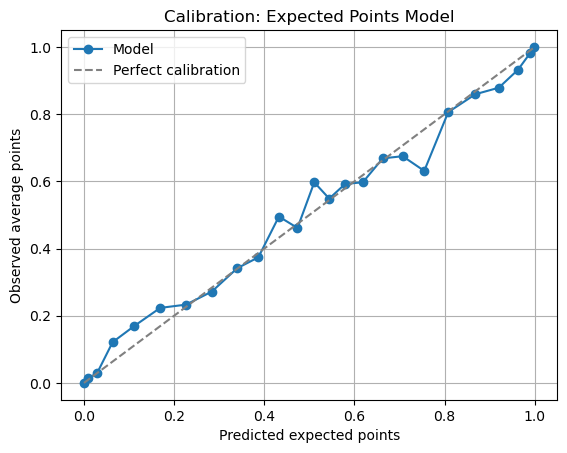

In [46]:
plt.plot(
    calibration["pred_mean"],
    calibration["y_mean"],
    marker="o",
    label="Model"
)

# Perfect calibration line
lims = [
    min(calibration["pred_mean"].min(), calibration["y_mean"].min()),
    max(calibration["pred_mean"].max(), calibration["y_mean"].max())
]
plt.plot(lims, lims, "--", color="gray", label="Perfect calibration")

plt.xlabel("Predicted expected points")
plt.ylabel("Observed average points")
plt.title("Calibration: Expected Points Model")
plt.legend()
plt.grid(True)
plt.show()

In [47]:
def predict_win_prob(row, model, scaler, feature_cols, device="cpu"):
    # 1. Extract features as DataFrame (important for scaler)
    X = row[feature_cols].to_frame().T

    # 2. Scale
    X_scaled = scaler.transform(X)

    # 3. Convert to tensor
    X_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)

    # 4. Forward pass
    model.eval()
    with torch.no_grad():
        logits = model(X_tensor)
        prob = torch.sigmoid(logits).item()  # P(win)

    return prob

In [48]:
row_idx = 8808
row = nnshots.loc[row_idx]

wp = predict_win_prob(
    row=row,
    model=wpModel,
    scaler=scaler,
    feature_cols=feature_cols,
    device=device
)

print(f"Predicted win probability: {wp:.3f}")

Predicted win probability: 0.502
